In [2]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2 < equal to m_1.



import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3





# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.
    
    
    
def merger_rate(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if  m_1 < 5 or m_2 < 5: 
        return 0
    
    elif m_2 > m_1:
        return 0
    
    else:
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        X = np.geomspace(1e-5, 1e5, 1000000) 

    
    
    
        if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

        
        
            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
        
            def integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
        
        
            return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X),X)) 
    
        else:

            # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k = 22.3387
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_halo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

        
        
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
            def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

            return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X)) 
      

In [3]:
m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'False'
Merger_PWR_1 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 1.14e-3
        f = 0.85 * f_pbh
        
          
        def P(m): #Powerlaw PBH mass distribution
            α = 1.6
            M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_PWR_1[i,j] = 0.5 * merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
        else:
            Merger_PWR_1[i,j] = merger_rate( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
    
        
np.save("Merger_PWR_1", Merger_PWR_1)

In [5]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


DM_halos_presence = 'False'
Merger_Lognormal_1 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 8.26e-4
        f = 0.85 * f_pbh 
        
        def P(m):                  #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

        if i==j:
            Merger_Lognormal_1[i, j] = 0.5 * merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
        else:
            Merger_Lognormal_1[i, j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            



np.save("Merger_Lognormal_1", Merger_Lognormal_1)

In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_haloPWR_1 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 7.94e-4
        f = 0.85 * f_pbh
        
          
        def P(m):      #Powerlaw PBH mass distribution
            α = 1.6
            M = 5      #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_haloPWR_1[i,j] = 0.5*merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halos_presence)
            
        else:
            Merger_haloPWR_1[i,j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halos_presence)   
    
        

np.save("Merger_haloPWR_1", Merger_haloPWR_1)

In [7]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halos_presence = 'True'
Merger_haloLognormal_1 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 5.26e-4
        f = 0.85 * f_pbh 
        
        def P(m):      #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15   #in units of M☉, for PBHs mass range of m_min = 5 M☉ -  m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_haloLognormal_1[i, j] = 0.5 * merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halos_presence)
            
        else:
            Merger_haloLognormal_1[i, j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            

np.save("Merger_haloLognormal_1", Merger_haloLognormal_1)

In [ ]:
# Merger rates for the wider range of PBH masses from m_min = 1e-3 M☉ - m_max = 100 M☉. 

In [8]:
bin_centres = np.geomspace(1e-2, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 

#Now we can calculate deltas:
deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉


m_1 = np.geomspace(1e-2, 96, 11)
m_2 = np.geomspace(1e-2, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
    


m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 




m_1_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] 
m_2_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_1 = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] M☉

Δ_1 = [0.00949415, 0.02375107, 0.05941695, 0.14864061, 0.37184728, 0.93023298, 2.32712042, 5.82164849, 14.56374623, 36.43344398, 91.14384576]


In [9]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.

DM_halo_presence = 'False'
Merger_PWR_2 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 1.18
        f = 0.85 * f_pbh
        
          
        def P(m): #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_PWR_2[i,j] = 0.5*merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halo_presence)
            
        else:
            Merger_PWR_2[i,j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halo_presence)   
    
        

np.save("Merger_PWR_2", Merger_PWR_2)

In [10]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1 = Δ_2 = Δ.


DM_halo_presence = 'False'
Merger_Lognormal_2 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 1.10e-3
        f = 0.85 * f_pbh 
        
        def P(m):                  #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15               #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

        if i==j:
            Merger_Lognormal_2[i, j] = 0.5 * merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halo_presence)
            
        else:
            Merger_Lognormal_2[i, j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halo_presence)
            



np.save("Merger_Lognormal_2", Merger_Lognormal_2)

In [11]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halo_presence = 'True'
Merger_haloPWR_2 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 1.18
        f = 0.85 * f_pbh
        
          
        def P(m): #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_haloPWR_2[i,j] = 0.5*merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halo_presence)
            
        else:
            Merger_haloPWR_2[i,j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halo_presence)   
    
        

np.save("Merger_haloPWR_2", Merger_haloPWR_2)

In [12]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

DM_halo_presence = 'True'
Merger_haloLognormal_2 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 7.20e-4
        f = 0.85*f_pbh 
        
        def P(m):               #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15             #in units of M☉, for PBHs mass range of m_in = 1e-3 M☉ - m_max = 100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_haloLognormal_2[i, j] = 0.5 * merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m, DM_halo_presence)
            
        else:
            Merger_haloLognormal_2[i, j] = merger_rate(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halo_presence)
            

np.save("Merger_haloLognormal_2", Merger_haloLognormal_2)

In [14]:
# Merger rates plots for the range of PBH masses from m_min = 5 M☉ - m_max = 100 M☉. 

In [1]:
# Plots of the merger rate for PBH mass range of (5 - 100) solar mass.


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    



m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


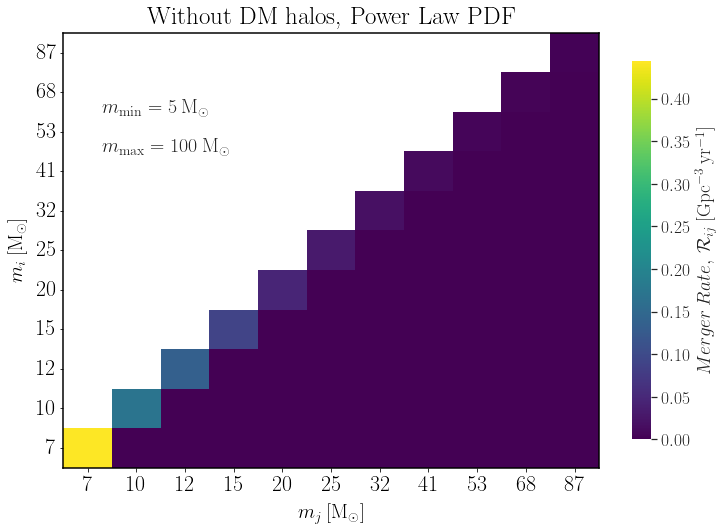

In [14]:
Merger_PWR_1 = np.load('Merger_PWR_1.npy')

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(12, 8))  




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



#  norm=LogNorm()


ax = sns.heatmap(Merger_PWR_1, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = { "shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title('Without DM halos, Power Law PDF', fontsize = 25, pad = 9)
plt.savefig('1PWRLawnoDM.pdf', bbox_inches = 'tight')
plt.show()     

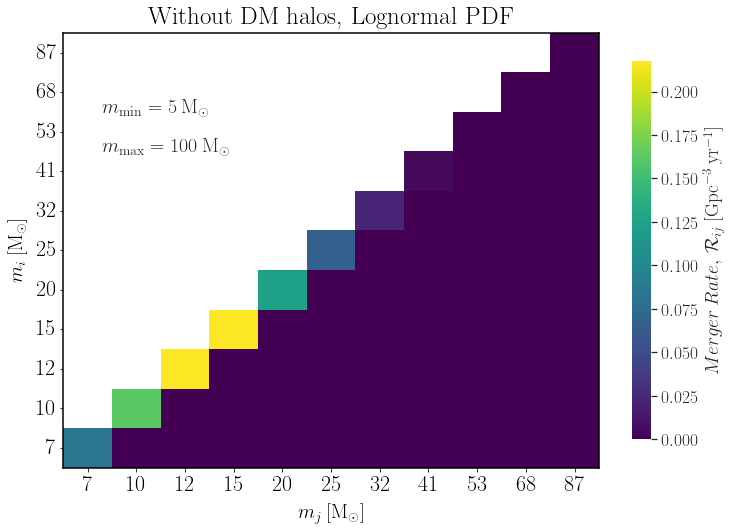

In [2]:
Merger_Lognormal_1= np.load('Merger_Lognormal_1.npy')


mask = np.tril(np.ones((11,11)),k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize = (12, 8))  


sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'


ax = sns.heatmap(Merger_Lognormal_1, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.87,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)


ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True, bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)


ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 25, pad = 9)
plt.savefig('1LogNormalnoDM.pdf', bbox_inches = 'tight')
plt.show()     

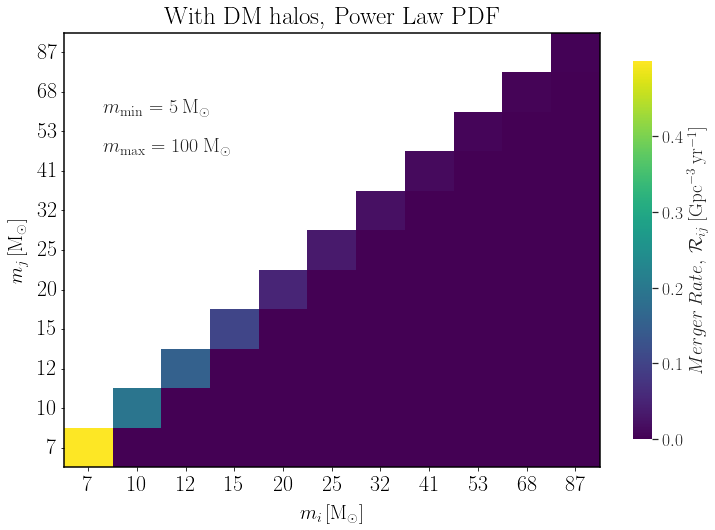

In [2]:
# Plot of merger rate for Power Law PBH mass function.

Merger_haloPWR_1 = np.load('Merger_haloPWR_1.npy')



mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(12, 8)) 



sns.set(font_scale = 1.6)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


ax = sns.heatmap(Merger_haloPWR_1, mask = mask,  cmap = 'viridis', cbar = True,  
                 cbar_kws = {"shrink": 0.87,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)


ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)




# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    

ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{i}\,[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)
plt.ylabel('$m_{j}\,[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 25, pad = 9)
plt.savefig('1hPWRLawDM.pdf', bbox_inches = 'tight')
plt.show()    

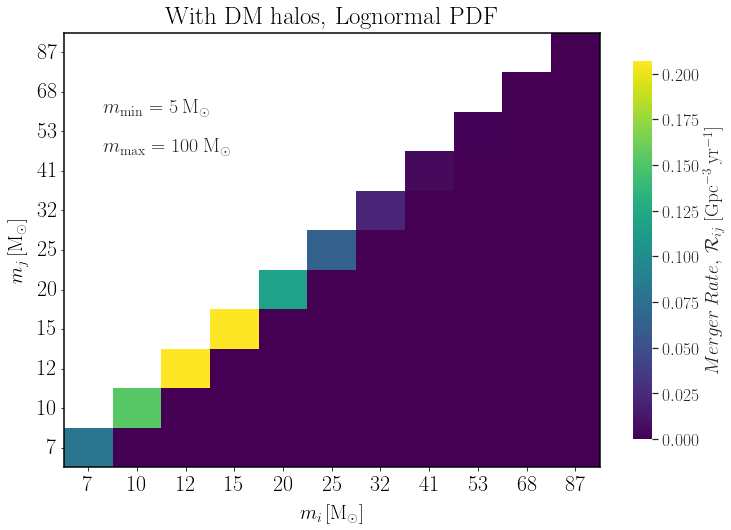

In [2]:
# Plot of merger rate for LogNormal PBH mass function.

Merger_haloLognormal_1 = np.load('Merger_haloLognormal_1.npy')


mask = np.tril(np.ones((11, 11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(12, 8)) 


sns.set(font_scale = 1.6)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'



ax = sns.heatmap(Merger_haloLognormal_1, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = {"shrink": 0.87,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)


 
ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$",  size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{i}\,[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9 )
plt.ylabel('$m_{j}\,[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)
plt.title('With DM halos, Lognormal PDF', fontsize = 25, pad = 9)
plt.savefig('1hLogNormalPDF.pdf', bbox_inches = 'tight')
plt.show()    

In [1]:
# Merger rates plots for the wider range of PBH masses from m_min = 1e-3 M☉ - m_max = 100 M☉. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    



bin_centres = np.geomspace(1e-2, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉


m_1 = np.geomspace(1e-2, 96, 11)
m_2 = np.geomspace(1e-2, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
    


m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 




m_1_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] 
m_2_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_1 = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] M☉

Δ_1 = [0.00949415, 0.02375107, 0.05941695, 0.14864061, 0.37184728, 0.93023298, 2.32712042, 5.82164849, 14.56374623, 36.43344398, 91.14384576]


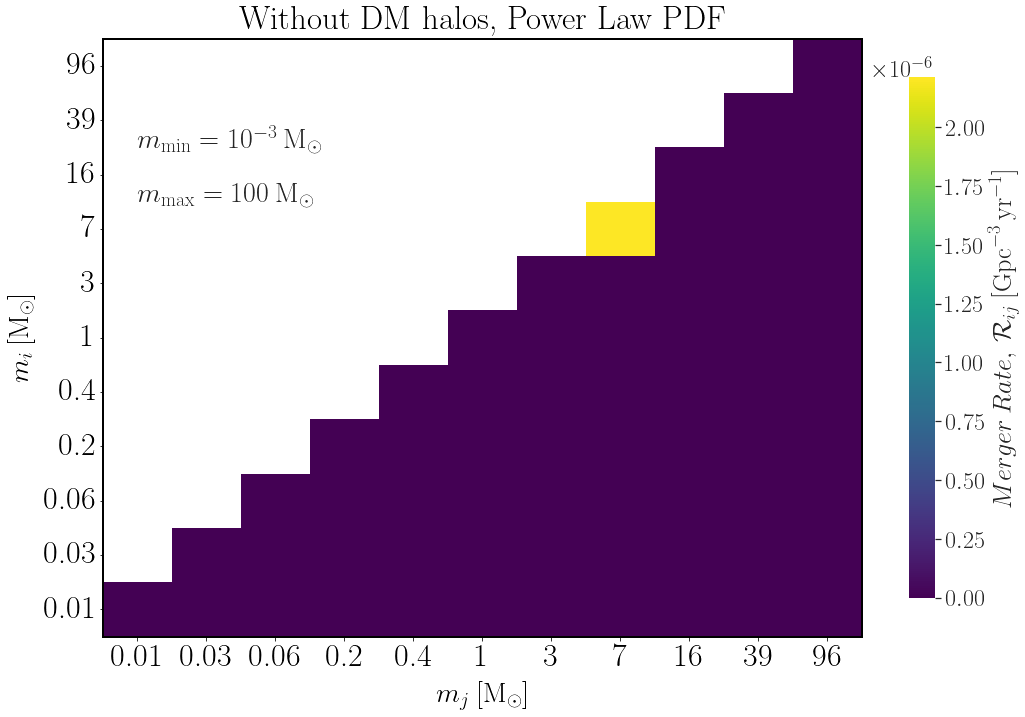

In [2]:
# Plot of merger rate for Power Law PBH mass function.

Merger_PWR_2 = np.load('Merger_PWR_2.npy')



mask = np.tril(np.ones((11, 11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(17, 11))  


sns.set(font_scale = 2.2)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'


ax = sns.heatmap(Merger_PWR_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 fmt = '0.8f', vmin = 0)



ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)

ax.text(0.5, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 28)
ax.text(0.5, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 28)



# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)


ax.invert_yaxis()
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)   # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)  # m_i = m_1  and m_2< equal to m_1.
plt.title('Without DM halos, Power Law PDF', fontsize = 33, pad = 9)
plt.savefig('2PWRLawnoDM.pdf', bbox_inches = 'tight')
plt.show()     

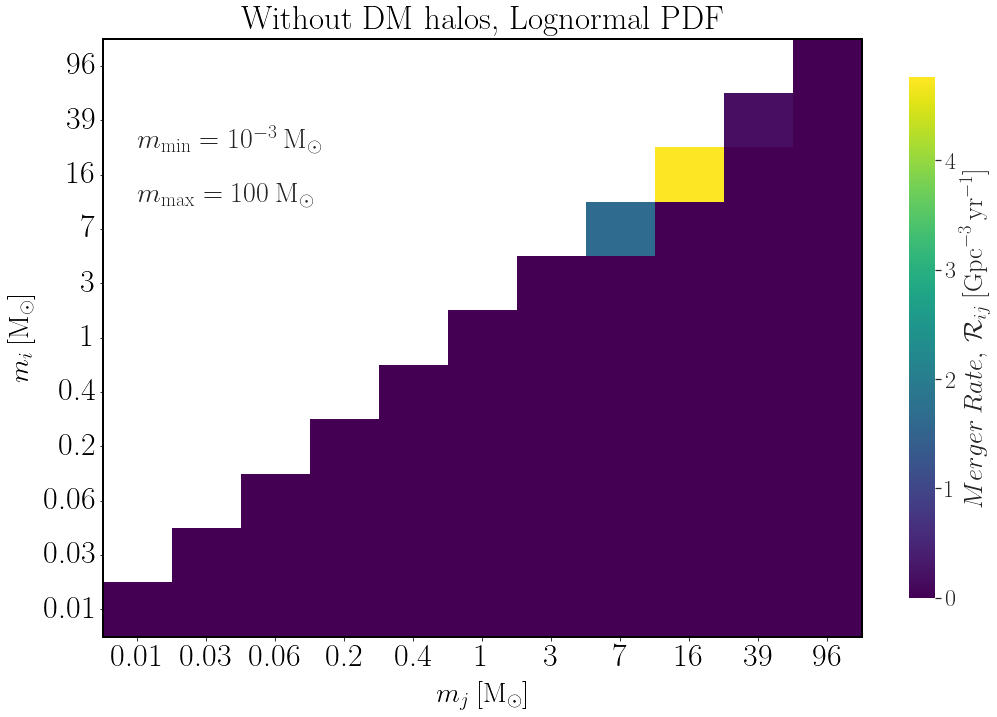

In [2]:
# Plot of merger rate for Lognormal PBH mass function.

Merger_Lognormal_2 = np.load('Merger_Lognormal_2.npy')


mask = np.tril(np.ones((11, 11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(17, 11))  


sns.set(font_scale = 2.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'


ax = sns.heatmap(Merger_Lognormal_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.87,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)





ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 200)
ax.tick_params(left=True, bottom=True)

ax.text(0.5, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 28)
ax.text(0.5, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 28)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)

ax.invert_yaxis()
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('$m_{j}\: [\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 33, pad = 9)
plt.savefig('2LogNormalnoDM.pdf', bbox_inches = 'tight')
plt.show()     

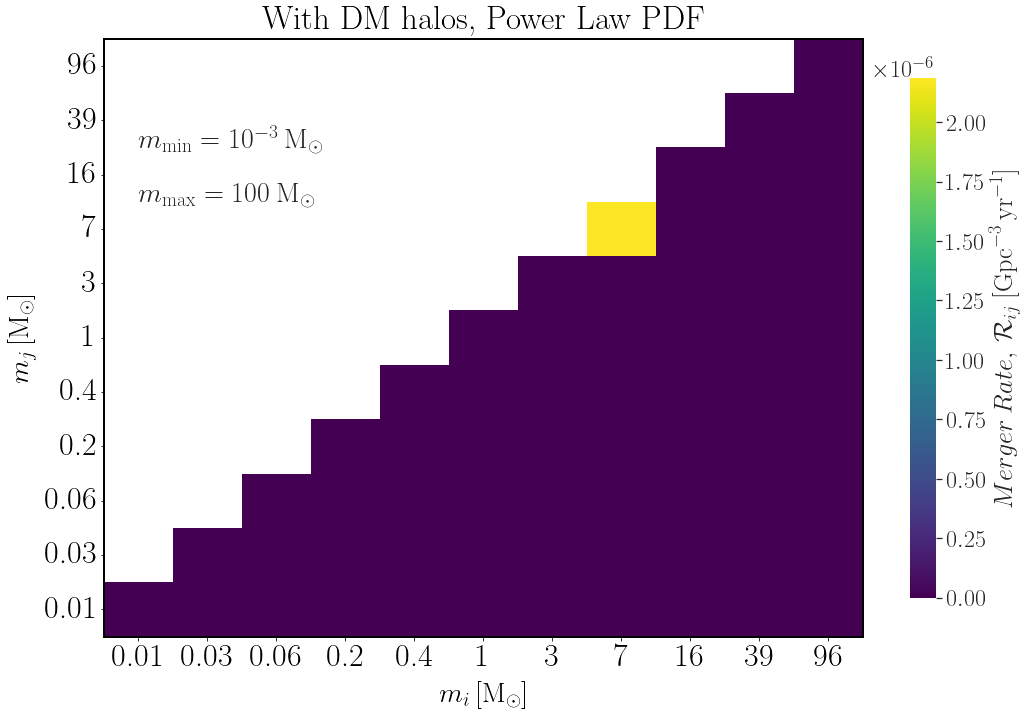

In [2]:
# Plot of merger rate for Power Law PBH mass function.

import matplotlib.colors as colors

Merger_haloPWR_2 = np.load('Merger_haloPWR_2.npy')

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize = (17, 11)) 


sns.set(font_scale = 2.2)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

# norm=colors.LogNorm(vmin = Merger_haloPWR_2.min(), vmax = Merger_haloPWR_2.max())
ax = sns.heatmap(Merger_haloPWR_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.87,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                   )


ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 200)

ax.text(0.5, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 28)
ax.text(0.5, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 28)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
    

ax.invert_yaxis()
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('$m_{i}\,[\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)
plt.ylabel('$m_{j}\,[\mathrm{M_{\odot}}]$', fontsize = 28, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 33, pad = 9)
plt.savefig('2hPWRLawDM.pdf', bbox_inches = 'tight')
plt.show()    

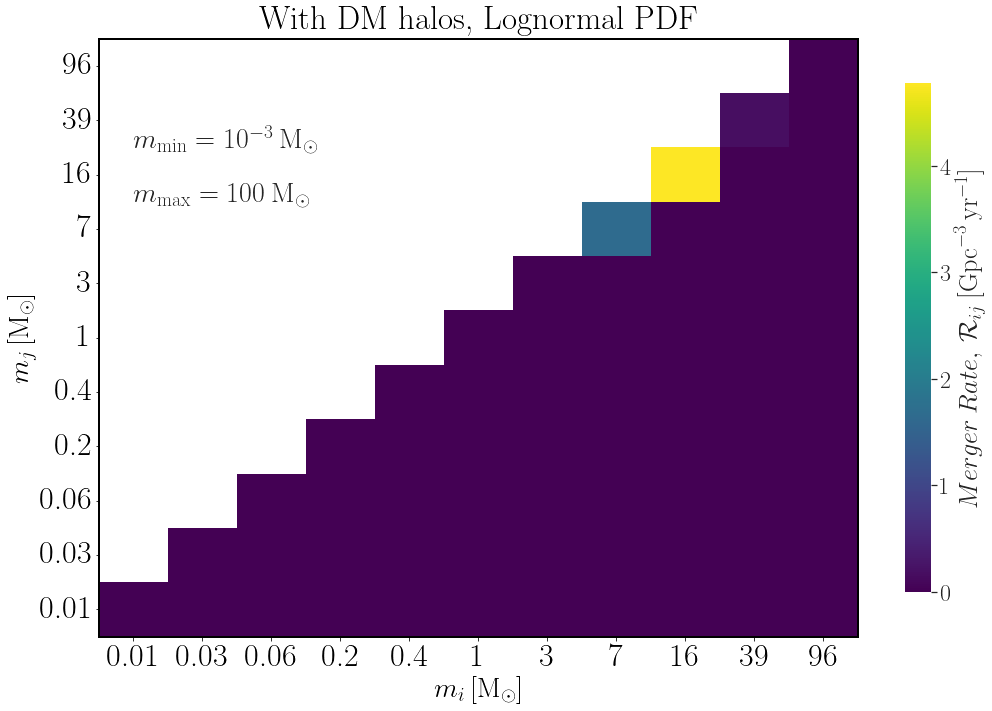

In [2]:
# Plot of merger rate for LogNormal PBH mass function.


Merger_haloLognormal_2 = np.load('Merger_haloLognormal_2.npy')


mask = np.tril(np.ones((11, 11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(17, 11)) 

sns.set(font_scale = 2.2)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'



ax = sns.heatmap(Merger_haloLognormal_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)


 
ax.set_xticklabels(m_1_list, fontsize = 200)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 200)
ax.text(0.5, 9, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 28)
ax.text(0.5, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 28)




# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
   
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('$m_{i}\, [\mathrm{M_{\odot}}]$', fontsize = 28)
plt.ylabel('$m_{j}\, [\mathrm{M_{\odot}}]$', fontsize = 28)
plt.title('With DM halos, Lognormal PDF', fontsize = 33, pad = 9)
plt.savefig('2hLogNormalDM.pdf', bbox_inches = 'tight')
plt.show()    

In [ ]:

def sciformat_3(x):
    n = np.floor(np.log10(x))
    m = x*(10.0**(-n))
    str1 = ""
    if (n in [0, 1]):
        return r'$%d$'%(x,)
    elif (m > 1.001):
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
    else:
        str2 = r'$10^{%d}$' % n
    return str1 + str2

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)
    
print('\v')
print("x_label =", xlabel_list)
